In [14]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

#mods: 1206paul_, aloddin, balintboss, banties1g, devilleboi, fossabot, gkey, hueqi, ivana_10, ivanonmyown, klimzaa, martin_gales, moki1g, nightbot, ravenbtw, streamelements, substen.

#data2 = data[data['user'] == '1206paul_']
#data2 = data[data['user'] == 'Aloddin']
#data2 = data[data['user'] == 'klimzaa']
data2 = data[data['user'] == 'balintboss']
#data2 = data[data['user'] == 'Banties1g']
#data2 = data[data['user'] == 'devilleboi']
#data2 = data[data['user'] == 'fossabot']
#data2 = data[data['user'] == 'gkey']
#data2 = data[data['user'] == 'Hueqi']
#data2 = data[data['user'] == 'IvanOnMyOwn']
#data2 = data[data['user'] == 'Ivana_10']
#data2 = data[data['user'] == 'Martin_Gales']

#data2 = data[data['user'] == 'moki1g']
#data2 = data[data['user'] == 'nightbot']
#data2 = data[data['user'] == 'Ravenbtw']
#data2 = data[data['user'] == 'StreamElements']
#data2 = data[data['user'] == 'Substen']
#data2 = data[data['user'] == 'Aluminiumminimumimmunity']
#data2 = data[data['user'] == 'fyodor_m_d1821']



#vips: 1SKELTON, fartnado2020, kloakpojken, kuddo_, nate_001_, ojov, pfftsmh, spinglebob, thebigdogjay, Typhu25, wasabi__ttv.

#data2 = data[data['user'] == 'Typhu25']
#data2 = data[data['user'] == 'fartnado2020']
#data2 = data[data['user'] == 'wasabi__ttv']
#data2 = data[data['user'] == '1SKELTON']
#data2 = data[data['user'] == 'pfftsmh']
#data2 = data[data['user'] == 'spinglebob']


#data2 = data[data['user'] == 'Trizze']
#data2 = data[data['user'] == 'MatthewTheTaxCollector']
#data2 = data[data['user'] == 'nate_001_']
#data2 = data[data['user'] == 'enseje']
#data2 = data[data['user'] == 'kunmilan99']
#data2 = data[data['user'] == 'GoodStuffBuds']
#data2 = data[data['user'] == 'peroni_nasturo_azuro']
#data2 = data[data['user'] == 'icep1cke']
#data2 = data[data['user'] == 'bigladmush22']










# Calculate the total number of messages per stream
total_messages_per_stream = data2['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'total_messages': total_messages_per_stream
})

# Calculate the time difference between the first and last messages for each stream
watch_lengths = data2.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['watch_length'] = watch_lengths

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

stream_stats = stream_stats.reset_index()
stream_stats = stream_stats.sort_values(by='stream')

stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length
4,81,139,22663.0,22666.0
14,82,100,23499.0,23537.0
45,83,47,13719.0,13756.0
16,84,88,20433.0,20460.0
5,85,138,21780.0,21814.0
2,86,186,23870.0,23912.0
11,87,103,21377.0,21392.0
7,88,125,23349.0,23717.0
0,89,214,25422.0,25491.0
3,90,139,22375.0,22401.0


In [15]:
data2['user'].max()

'balintboss'

In [16]:
# Create a DataFrame with all possible stream values (0 to 80)
all_streams = pd.DataFrame({'stream': range(data['stream'].max()+1)})

# Merge the original DataFrame with the all_streams DataFrame
stream_stats = all_streams.merge(stream_stats, on='stream', how='left')

# Fill missing values with 0
stream_stats.fillna(0, inplace=True)


stream_stats.tail(5)


,stream,total_messages,watch_length,stream_length
86,86,186,23870.0,23912.0
87,87,103,21377.0,21392.0
88,88,125,23349.0,23717.0
89,89,214,25422.0,25491.0
90,90,139,22375.0,22401.0


In [17]:
stream_stats.describe()

,stream,total_messages,watch_length,stream_length
count,91.00000,91.000000,91.000000,91.000000
mean,45.00000,58.681319,18460.318681,18879.549451
std,26.41338,42.032759,5142.847333,5096.502291
min,0.00000,5.000000,2861.000000,5257.000000
25%,22.50000,28.000000,16021.000000,17096.000000
50%,45.00000,47.000000,18436.000000,18574.000000
75%,67.50000,79.000000,21354.500000,21722.000000
max,90.00000,214.000000,35147.000000,36105.000000


In [18]:
stream_stats['watch_length_in_hour'] = stream_stats['watch_length'] / 60 /60
stream_stats['stream_length_in_hour'] = stream_stats['stream_length'] / 60 /60

stream_stats.head(5)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour
0,0,33,17532.0,17697.0,4.870000,4.915833
1,1,25,16994.0,17831.0,4.720556,4.953056
2,2,37,18697.0,19147.0,5.193611,5.318611
3,3,22,14924.0,17451.0,4.145556,4.847500
4,4,23,17458.0,18734.0,4.849444,5.203889


In [19]:
stream_stats['persenteg'] = stream_stats['watch_length'] / stream_stats['stream_length'] * 100
stream_stats['persenteg'] = stream_stats['persenteg'].fillna(0)

stream_stats.head(20)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,33,17532.0,17697.0,4.870000,4.915833,99.067639
1,1,25,16994.0,17831.0,4.720556,4.953056,95.305928
2,2,37,18697.0,19147.0,5.193611,5.318611,97.649762
3,3,22,14924.0,17451.0,4.145556,4.847500,85.519454
4,4,23,17458.0,18734.0,4.849444,5.203889,93.188854
5,5,76,20013.0,20382.0,5.559167,5.661667,98.189579
6,6,23,16043.0,16563.0,4.456389,4.600833,96.860472
7,7,22,15999.0,17773.0,4.444167,4.936944,90.018567
8,8,55,18475.0,18686.0,5.131944,5.190556,98.870812
9,9,43,15648.0,16418.0,4.346667,4.560556,95.310026


In [20]:
stream_stats['persenteg'].describe()

count    91.000000
mean     97.328718
std       5.628864
min      54.422675
25%      97.478929
50%      99.156849
75%      99.758836
max      99.986764
Name: persenteg, dtype: float64

In [21]:
stream_stats = stream_stats.sort_values(by='persenteg')

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
51,51,17,2861.0,5257.0,0.794722,1.460278,54.422675
3,3,22,14924.0,17451.0,4.145556,4.847500,85.519454
38,38,50,23739.0,27145.0,6.594167,7.540278,87.452570
42,42,12,6857.0,7832.0,1.904722,2.175556,87.551073
64,64,37,16325.0,18507.0,4.534722,5.140833,88.209867
57,57,9,19297.0,21863.0,5.360278,6.073056,88.263276
7,7,22,15999.0,17773.0,4.444167,4.936944,90.018567
23,23,13,11429.0,12616.0,3.174722,3.504444,90.591313
70,70,24,16314.0,18002.0,4.531667,5.000556,90.623264
4,4,23,17458.0,18734.0,4.849444,5.203889,93.188854


In [22]:
stream_stats['watch_length_in_hour'].sum() /24

19.443159722222223

In [23]:

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
51,51,17,2861.0,5257.0,0.794722,1.460278,54.422675
3,3,22,14924.0,17451.0,4.145556,4.847500,85.519454
38,38,50,23739.0,27145.0,6.594167,7.540278,87.452570
42,42,12,6857.0,7832.0,1.904722,2.175556,87.551073
64,64,37,16325.0,18507.0,4.534722,5.140833,88.209867
57,57,9,19297.0,21863.0,5.360278,6.073056,88.263276
7,7,22,15999.0,17773.0,4.444167,4.936944,90.018567
23,23,13,11429.0,12616.0,3.174722,3.504444,90.591313
70,70,24,16314.0,18002.0,4.531667,5.000556,90.623264
4,4,23,17458.0,18734.0,4.849444,5.203889,93.188854


In [24]:
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
50,50,87,22521.0,22548.0,6.255833,6.263333,99.880255
90,90,139,22375.0,22401.0,6.215278,6.222500,99.883934
80,80,102,22238.0,22263.0,6.177222,6.184167,99.887706
71,71,64,26810.0,26839.0,7.447222,7.455278,99.891948
39,39,32,17225.0,17240.0,4.784722,4.788889,99.912993
73,73,104,19839.0,19854.0,5.510833,5.515000,99.924448
87,87,103,21377.0,21392.0,5.938056,5.942222,99.929880
79,79,79,18436.0,18445.0,5.121111,5.123611,99.951206
77,77,99,14990.0,14994.0,4.163889,4.165000,99.973323
81,81,139,22663.0,22666.0,6.295278,6.296111,99.986764


In [25]:
stream_stats = stream_stats.sort_values(by='stream')
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
81,81,139,22663.0,22666.0,6.295278,6.296111,99.986764
82,82,100,23499.0,23537.0,6.527500,6.538056,99.838552
83,83,47,13719.0,13756.0,3.810833,3.821111,99.731026
84,84,88,20433.0,20460.0,5.675833,5.683333,99.868035
85,85,138,21780.0,21814.0,6.050000,6.059444,99.844137
86,86,186,23870.0,23912.0,6.630556,6.642222,99.824356
87,87,103,21377.0,21392.0,5.938056,5.942222,99.929880
88,88,125,23349.0,23717.0,6.485833,6.588056,98.448370
89,89,214,25422.0,25491.0,7.061667,7.080833,99.729316
90,90,139,22375.0,22401.0,6.215278,6.222500,99.883934


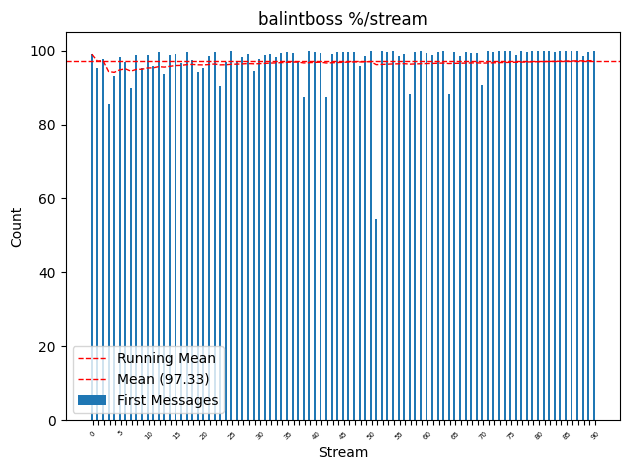

In [26]:
# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['persenteg'], bar_width, label='First Messages')

# Calculate mean of first messages
persenteg_messages = stream_stats['persenteg'].mean()

stream_stats['persenteg_avg'] = stream_stats['persenteg'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['persenteg_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(persenteg_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({persenteg_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title(data2['user'].max() + ' %/stream', fontsize=12)

# Set x-ticks and x-tick labels
ax.set_xticks([i + bar_width / 2 for i in index])
xtick_labels = ['' if i % 5 != 0 else stream_stats['stream'][i] for i in index]
ax.set_xticklabels(xtick_labels, fontsize=5)  # Adjust x-tick labels font size

# Add legend
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()